# Plotclient for ptypy (online and offline)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
from ptypy.utils import PlotClient, validator, ortho
from ptypy.utils.plot_utils import PtyAxis
from ptypy.io import h5read

## Start the online viewer

In [2]:
pc   = PlotClient(validator.make_sub_default('.io.interaction'),in_thread=False)
data = lambda: pc.get_data()
pc.start()

## Stop the online viewer

In [ ]:
pc.stop()

## Load data from file

In [ ]:
base_path = '/Users/benedikt/phd-project/experiments/amok3415/reconstruction/recons/'
filename  = base_path + 'newrecons/newrecons_DM_0500.ptyr'
f = h5read(filename)
data = lambda: (f['content']['probe'], f['content']['obj'], f['content']['runtime'])

## Plotting object

In [12]:
ptya = PtyAxis(channel='a',cmap='viridis', vmin=None, vmax=None)
ptya.add_colorbar()
ptya.ax.set_title('Iteration %d' %data()[2].last_info['iteration'], size=12) 
ptya.set_data(data()[1]['S00G00']['data'][0])

<IPython.core.display.Javascript object>

## Plotting probe (after normalization)

<IPython.core.display.Javascript object>


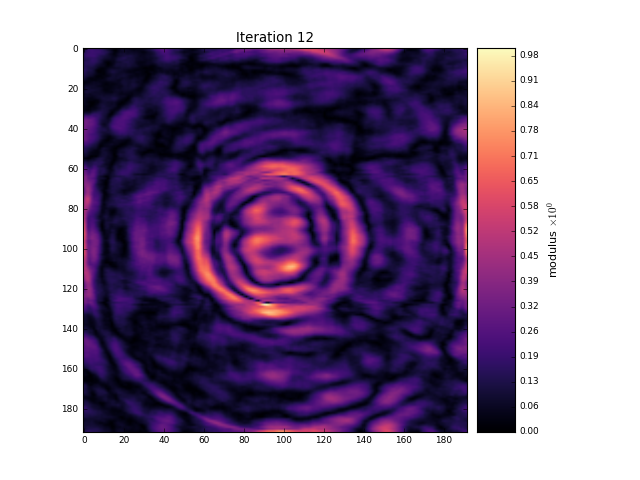

In [10]:
ptya = PtyAxis(channel='a',cmap='magma', vmax=None)
ptya.add_colorbar()
ptya.ax.set_title('Iteration %d' %data()[2].last_info['iteration'], size=12) 
ptya.set_data(ortho(data()[0]['S00G00']['data'][:])[1][0])

## Plotting errors

<IPython.core.display.Javascript object>


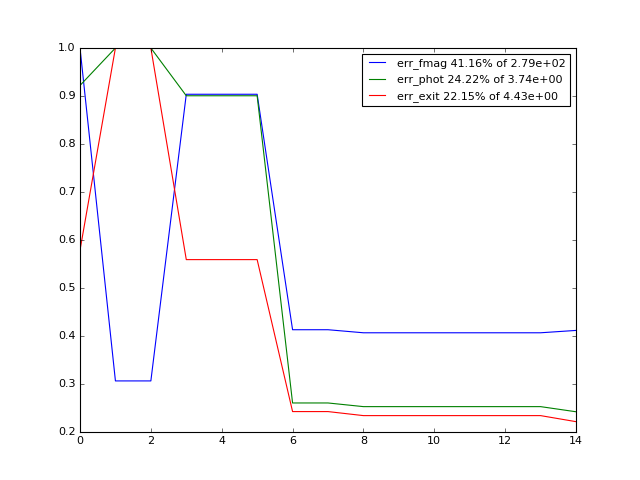

In [11]:
fig = plt.figure()
ax  = fig.add_subplot(111)
error = np.array([info['error'] for info in data()[2].iter_info])
err_fmag = error[:, 0]
err_phot = error[:, 1]
err_exit = error[:, 2]
fmag = err_fmag/np.max(err_fmag)
ax.plot(fmag, label='err_fmag %2.2f%% of %.2e' % (fmag[-1]*100, np.max(err_fmag)))
phot = err_phot/np.max(err_phot)
ax.plot(phot, label='err_phot %2.2f%% of %.2e' % (phot[-1]*100, np.max(err_phot)))
ex = err_exit/np.max(err_exit)
ax.plot(ex, label='err_exit %2.2f%% of %.2e' % (ex[-1]*100, np.max(err_exit)))
ax.legend(loc=1, fontsize=10)
plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
plt.show()